Medical Incurance Cost Prediction

Importing the Dependencies

In [1]:
import kaggle as kg
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics


Data Collection and Analysis

In [2]:

# Download the dataset
os.environ['KAGGLE_USERNAME'] = 'firrex'
os.environ['KAGGLE_KEY'] = 'ce0e7c23f4f3624c6b36e0c5733d845f'

kg.api.authenticate()


In [3]:
kg.api.dataset_download_files('mirichoi0218/insurance', path='On-Zip', unzip=True)


Dataset URL: https://www.kaggle.com/datasets/mirichoi0218/insurance


In [4]:
#load the data
insurance_data = pd.read_csv('On-Zip/insurance.csv')

In [5]:
#display the first 5 rows of the dataset
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
#check the shape of the dataset
insurance_data.shape

(1338, 7)

In [7]:
#information about the dataset
insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Categoriacaion of Data
1. sex
2. smoker
3. region

In [8]:
#check for missing values
insurance_data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Data Analysis

In [9]:
insurance_data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<Figure size 2000x2000 with 0 Axes>

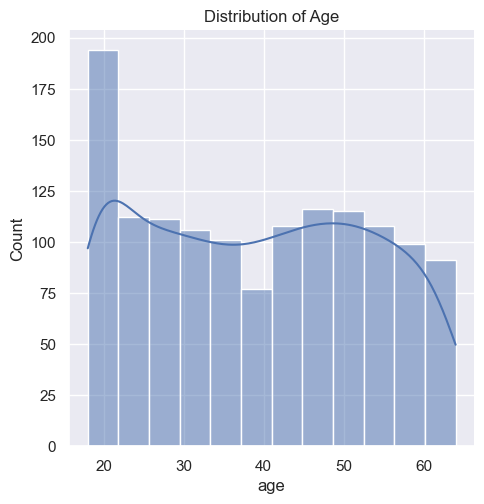

In [10]:
#visualize the relationship between the features and the target using scatterplots
sns.set()
plt.figure(figsize=(20, 20))
sns.displot(insurance_data['age'], kde=True,)
plt.title('Distribution of Age')
plt.show()

Text(0.5, 1.0, 'Sex Distribution')

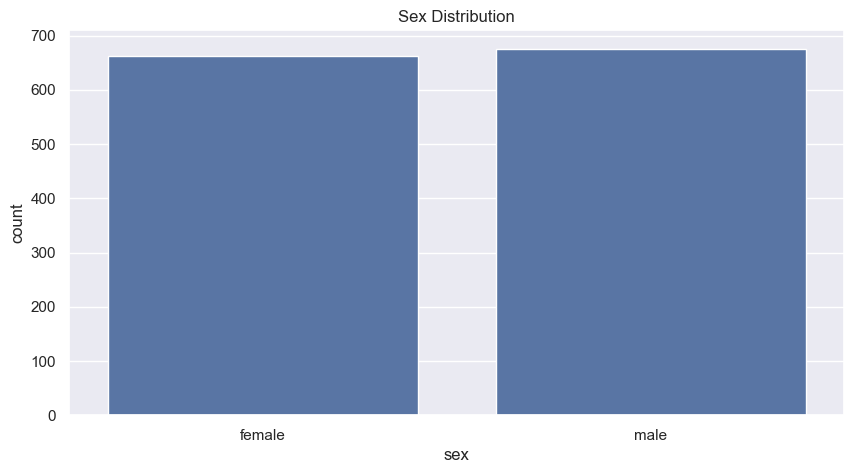

In [11]:
#Gender Column
plt.figure(figsize=(10, 5))
sns.countplot(x ='sex', data = insurance_data)
plt.title('Sex Distribution')

In [12]:
insurance_data['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

<Figure size 1000x500 with 0 Axes>

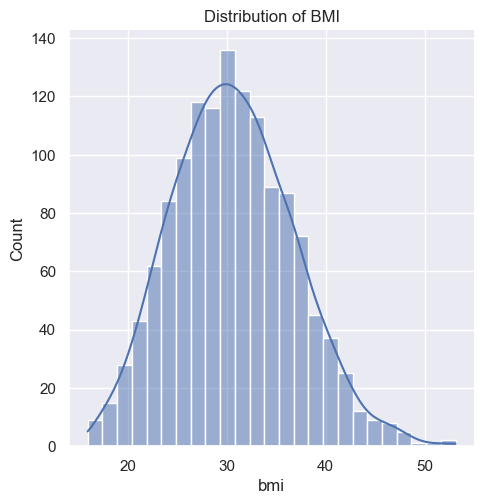

In [13]:
#BMI Column
plt.figure(figsize=(10, 5))
sns.displot(insurance_data['bmi'], kde=True)
plt.title('Distribution of BMI')
plt.show()

Normal BMI Range - 18.5 - 24.9

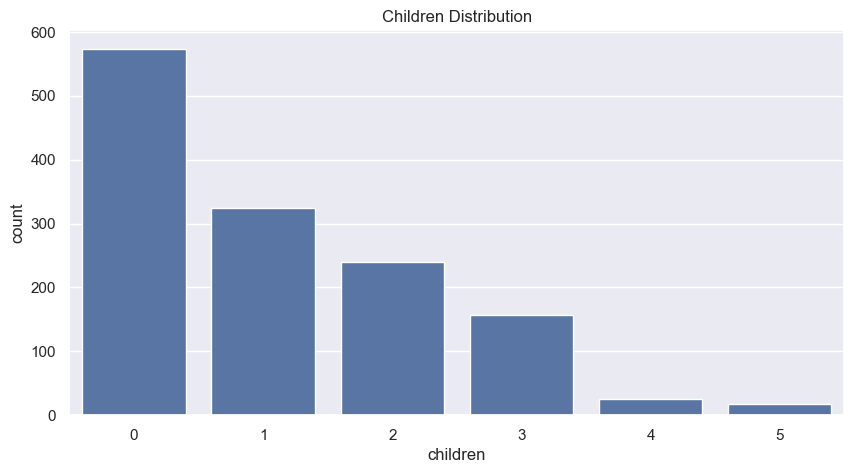

In [14]:
#children Column
plt.figure(figsize=(10, 5))
sns.countplot(x ='children', data = insurance_data)
plt.title('Children Distribution')
plt.show()

In [15]:
insurance_data['children'].value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

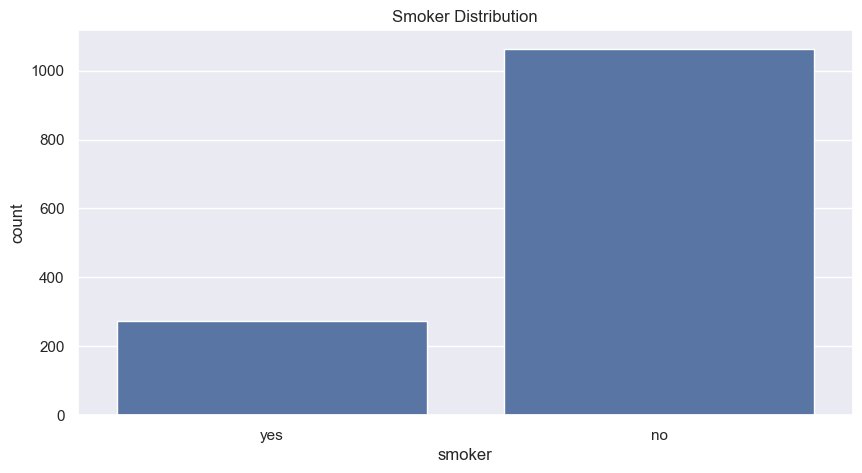

In [16]:
#smoker Column
plt.figure(figsize=(10, 5))
sns.countplot(x ='smoker', data = insurance_data)
plt.title('Smoker Distribution')
plt.show()

In [17]:
insurance_data['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

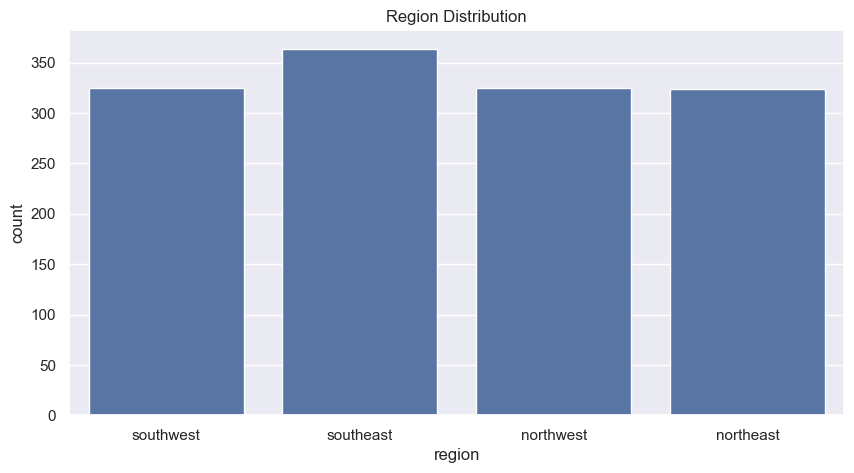

In [18]:
#region Column
plt.figure(figsize=(10, 5))
sns.countplot(x ='region', data = insurance_data)
plt.title('Region Distribution')
plt.show()


In [19]:
insurance_data['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

Data Preprocessing

Encoding the categorical data

In [20]:
#encoding
insurance_data.replace({'sex':{'male':0,'female':1},'smoker':{'yes':0,'no':1},
                        'region':{'southeast':0,'southwest':1,'northeast':2, 'northwest':3}}, inplace=True)


C:\Users\Asus\AppData\Local\Temp\ipykernel_21028\4149200494.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  insurance_data.replace({'sex':{'male':0,'female':1},'smoker':{'yes':0,'no':1},


In [21]:
#first 5 row and columns
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520


Separating the Features and Target


In [22]:
X = insurance_data.drop(columns='charges', axis=1)
Y = insurance_data['charges']

In [23]:
print(X)
print(Y)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       3
4      32    0  28.880         0       1       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       3
1334   18    1  31.920         0       1       2
1335   18    1  36.850         0       1       0
1336   21    1  25.800         0       1       1
1337   61    1  29.070         0       0       3

[1338 rows x 6 columns]
0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


Train Test Split

In [24]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y ,test_size=0.2, random_state=2)

In [25]:
print(X.shape, X_train.shape, X_test.shape)

(1338, 6) (1070, 6) (268, 6)


Model Training
Linear Regression

In [26]:
model = LinearRegression()

In [27]:
model.fit(X_train,Y_train)

LinearRegression()

Model Evaluation

Training and Testing Score

In [28]:
train_prediction = model.predict(X_train)
accuracy_train = metrics.r2_score(Y_train, train_prediction)
print('R2 value of train data:', accuracy_train)

R2 value of train data: 0.751505643411174


In [29]:
test_prediction = model.predict(X_test)
accuracy_test = metrics.r2_score(Y_test, test_prediction)
print('R2 value of test data:', accuracy_test)

R2 value of test data: 0.7447273869684077


Buid Prediciton System

In [31]:
input_data = (31,1,25.74,0,1,0)
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
prediction = model.predict(input_data_reshaped)
print(prediction)
print('The insurance cost is USD', prediction[0])

[3760.0805765]
The insurance cost is USD 3760.0805764960587


c:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
